# Прогнозирование оттока банковских клиентов👨🏼‍💼

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.
Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Нам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

**Цели исследования**
1. Построить модель, которая покажет значение метрики `F1` больше `0.59` на тестовых данных;
2. Исследовать (при наличии) дисбаланс классов в целевом признаке. Оценить целесообразность использования техник `downsampling` и `upsampling` применительно к обучающим данным для моделей;

**Ход исследования**

[Скачать исходные данные](https://code.s3.yandex.net/datasets/Churn.csv)

О качестве данных ничего не известно, поэтому требуется их предобработать.

В ходе этапа предобработки данные будут разделены на три набора: тренировочный, валидационный и тестовый. Соотношение 3:1\:1.

Рассмотрим несколько популярных моделей, которые потенциально могут показать хорошие значения метрик. Сравним их между собой, отберем модель с наилучшими показателями.

Проверим ее эффективность на тестовых данных, опишем, как поменялись полученные в ходе тестирования модели значения метрик относительно тех, что были получены в ходе обучения модели.

Проведем проверку модели на адекватность, сравнив модель с константной.

**Этапы исследования**

1. Обзор данных
2. Предобработка данных
3. Обучение моделей, выбор лучшей
4. Тестирование модели, проверка ее на адекватность
5. Подведение итогов

**Описание данных**

*Признаки*

- `RowNumber` — индекс строки в данных
- `CustomerId` — уникальный идентификатор клиента
- `Surname` — фамилия
- `CreditScore` — кредитный рейтинг
- `Geography` — страна проживания
- `Gender` — пол
- `Age` — возраст
- `Tenure` — сколько лет человек является клиентом банка
- `Balance` — баланс на счёте
- `NumOfProducts` — количество продуктов банка, используемых клиентом
- `HasCrCard` — наличие кредитной карты
- `IsActiveMember` — активность клиента
- `EstimatedSalary` — предполагаемая зарплата

*Целевой признак*

- `Exited` — факт ухода клиента

<h1>Содержание проекта<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных-⌗" data-toc-modified-id="Обзор-данных-⌗-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных ⌗</a></span></li><li><span><a href="#Предобработка-данных-♻️" data-toc-modified-id="Предобработка-данных-♻️-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных ♻️</a></span><ul class="toc-item"><li><span><a href="#Переименование-столбцов" data-toc-modified-id="Переименование-столбцов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Переименование столбцов</a></span></li><li><span><a href="#Пропущенные-значения" data-toc-modified-id="Пропущенные-значения-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Пропущенные значения</a></span><ul class="toc-item"><li><span><a href="#tenure" data-toc-modified-id="tenure-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span><code>tenure</code></a></span></li></ul></li><li><span><a href="#Явные-дубликаты" data-toc-modified-id="Явные-дубликаты-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Явные дубликаты</a></span></li><li><span><a href="#Отбрасывание-незначимых-признаков" data-toc-modified-id="Отбрасывание-незначимых-признаков-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Отбрасывание незначимых признаков</a></span></li><li><span><a href="#Разбиение-данных" data-toc-modified-id="Разбиение-данных-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Разбиение данных</a></span></li><li><span><a href="#Кодирование-категориальных-признаков-и-стандартизация-числовых-признаков-в-наборах-данных" data-toc-modified-id="Кодирование-категориальных-признаков-и-стандартизация-числовых-признаков-в-наборах-данных-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Кодирование категориальных признаков и стандартизация числовых признаков в наборах данных</a></span></li><li><span><a href="#Сбалансированность-классов-целевого-признака" data-toc-modified-id="Сбалансированность-классов-целевого-признака-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Сбалансированность классов целевого признака</a></span><ul class="toc-item"><li><span><a href="#downsampling" data-toc-modified-id="downsampling-2.7.1"><span class="toc-item-num">2.7.1&nbsp;&nbsp;</span><code>downsampling</code></a></span></li><li><span><a href="#upsampling" data-toc-modified-id="upsampling-2.7.2"><span class="toc-item-num">2.7.2&nbsp;&nbsp;</span><code>upsampling</code></a></span></li></ul></li></ul></li><li><span><a href="#Обучение-моделей-🦾" data-toc-modified-id="Обучение-моделей-🦾-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение моделей 🦾</a></span><ul class="toc-item"><li><span><a href="#Функции-общего-назначения" data-toc-modified-id="Функции-общего-назначения-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Функции общего назначения</a></span></li><li><span><a href="#Логистическая-регрессия-(Logistic-Regression)-📈" data-toc-modified-id="Логистическая-регрессия-(Logistic-Regression)-📈-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Логистическая регрессия (Logistic Regression) 📈</a></span><ul class="toc-item"><li><span><a href="#Набор-тренировочных-данных-без-изменений-⚠️" data-toc-modified-id="Набор-тренировочных-данных-без-изменений-⚠️-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Набор тренировочных данных без изменений ⚠️</a></span><ul class="toc-item"><li><span><a href="#Результаты" data-toc-modified-id="Результаты-3.2.1.1"><span class="toc-item-num">3.2.1.1&nbsp;&nbsp;</span>Результаты</a></span></li></ul></li><li><span><a href="#Набор-тренировочных-данных-без-дисбаланса-классов-в-целевом-признаке-✅" data-toc-modified-id="Набор-тренировочных-данных-без-дисбаланса-классов-в-целевом-признаке-✅-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Набор тренировочных данных без дисбаланса классов в целевом признаке ✅</a></span><ul class="toc-item"><li><span><a href="#Результаты" data-toc-modified-id="Результаты-3.2.2.1"><span class="toc-item-num">3.2.2.1&nbsp;&nbsp;</span>Результаты</a></span></li></ul></li></ul></li><li><span><a href="#Случайный-лес-🌳" data-toc-modified-id="Случайный-лес-🌳-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Случайный лес 🌳</a></span><ul class="toc-item"><li><span><a href="#Набор-тренировочных-данных-без-изменений-⚠️" data-toc-modified-id="Набор-тренировочных-данных-без-изменений-⚠️-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Набор тренировочных данных без изменений ⚠️</a></span><ul class="toc-item"><li><span><a href="#Результаты" data-toc-modified-id="Результаты-3.3.1.1"><span class="toc-item-num">3.3.1.1&nbsp;&nbsp;</span>Результаты</a></span></li></ul></li><li><span><a href="#Набор-тренировочных-данных-без-дисбаланса-классов-в-целевом-признаке-✅" data-toc-modified-id="Набор-тренировочных-данных-без-дисбаланса-классов-в-целевом-признаке-✅-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Набор тренировочных данных без дисбаланса классов в целевом признаке ✅</a></span><ul class="toc-item"><li><span><a href="#Результаты" data-toc-modified-id="Результаты-3.3.2.1"><span class="toc-item-num">3.3.2.1&nbsp;&nbsp;</span>Результаты</a></span></li></ul></li></ul></li><li><span><a href="#Сравнение-ROC-кривых" data-toc-modified-id="Сравнение-ROC-кривых-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Сравнение ROC-кривых</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Результаты" data-toc-modified-id="Результаты-3.4.0.1"><span class="toc-item-num">3.4.0.1&nbsp;&nbsp;</span>Результаты</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Тестирование-лучшей-модели,-проверка-ее-на-адекватность-😎" data-toc-modified-id="Тестирование-лучшей-модели,-проверка-ее-на-адекватность-😎-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование лучшей модели, проверка ее на адекватность 😎</a></span><ul class="toc-item"><li><span><a href="#Тестирование-модели-🧪" data-toc-modified-id="Тестирование-модели-🧪-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Тестирование модели 🧪</a></span></li><li><span><a href="#Проверка-модели-на-адекватность-🤨" data-toc-modified-id="Проверка-модели-на-адекватность-🤨-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Проверка модели на адекватность 🤨</a></span></li></ul></li><li><span><a href="#Общий-вывод-👀" data-toc-modified-id="Общий-вывод-👀-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод 👀</a></span><ul class="toc-item"><li><span><a href="#Краткая-сводка-по-выполненным-задачам" data-toc-modified-id="Краткая-сводка-по-выполненным-задачам-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Краткая сводка по выполненным задачам</a></span><ul class="toc-item"><li><span><a href="#Шаг-1.-Обзор-данных" data-toc-modified-id="Шаг-1.-Обзор-данных-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Шаг 1. Обзор данных</a></span></li><li><span><a href="#Шаг-2.-Предобработка-данных" data-toc-modified-id="Шаг-2.-Предобработка-данных-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Шаг 2. Предобработка данных</a></span></li><li><span><a href="#Шаг-3.-Обучение-моделей" data-toc-modified-id="Шаг-3.-Обучение-моделей-5.1.3"><span class="toc-item-num">5.1.3&nbsp;&nbsp;</span>Шаг 3. Обучение моделей</a></span></li><li><span><a href="#Шаг-4.-Тестирование-модели,-проверка-ее-на-адекватность" data-toc-modified-id="Шаг-4.-Тестирование-модели,-проверка-ее-на-адекватность-5.1.4"><span class="toc-item-num">5.1.4&nbsp;&nbsp;</span>Шаг 4. Тестирование модели, проверка ее на адекватность</a></span></li></ul></li><li><span><a href="#Что-могло-привести-к-получению-неполноценных-результатов?" data-toc-modified-id="Что-могло-привести-к-получению-неполноценных-результатов?-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Что могло привести к получению неполноценных результатов?</a></span></li></ul></li></ul></div>

## Обзор данных ⌗

Используемые библиотеки

In [1]:
import pandas as pd  # Чтение данных, построение таблиц
import numpy as np  # Операции с массивами данных
import matplotlib.pyplot as plt  # Построение графиков
import seaborn as sns  # Построение графиков

from sklearn.ensemble import RandomForestClassifier  # Классификационная модель 1
from sklearn.linear_model import LogisticRegression  # Классификационная модель 2
from sklearn.dummy import DummyClassifier  # Константная модель

from sklearn.model_selection import cross_val_score, train_test_split # Работа с наборами данных
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve  # Оцениваемые метрики

from sklearn.preprocessing import StandardScaler  # Масштабирование данных
from sklearn.utils import shuffle  # Перемешивание объектов в наборе данных

from copy import copy  # Неглубокое копирование
from typing import Tuple, List, Dict  # Аннотирование
from IPython.display import display  # Корректное отображение датасетов в коде
import warnings  # Показ предупреждений
import urllib  # Получение данных с внешнего источника

Настройки отображения

In [2]:
pd.set_option('display.max_columns', 1000) # Макс кол-во отображаемых признаков
pd.set_option('display.max_rows', 50) # Макс кол-во отображаемых объектов
warnings.filterwarnings('ignore') # Убираем показ предупреждений

Прочитаем данные. Обработаем ошибки при их получении

In [3]:
try:
    data = pd.read_csv(
        'https://code.s3.yandex.net/datasets/Churn.csv')
    display(data.head(10))
    print('✅ Данные загружены с внешнего ресурса и успешно прочитаны')
except urllib.request.URLError:  # Если отстутствует доступ к внешнему ресурсу с данными
    while True:
        data_name = input(
            'Укажите имя файла с данными в каталоге с проектом. Например: "data.csv".\n'
            'Если данные находятся не в каталоге с проектом нажмите Enter.\n\n'
        )
        if not data_name:
            while True:
                data_path = input('Введите абсолютный путь к датасету:\n')
                try:
                    data = pd.read_csv(data_path)
                    display(data.head(10))
                    print('✅ Исходные данные успешно прочитаны по указанному пути')

                    break

                except FileNotFoundError:  # Путь, указанный пользователем, неверный
                    raise Exception(f'❌Указан неверный путь к файлу: {data_path}')
        else:
            data = pd.read_csv(data_name)
            display(data.head(10))
            print('✅ Исходные данные успешно прочитаны из каталога с проектом')
            break
        break

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


✅ Данные загружены с внешнего ресурса и успешно прочитаны


Выведем общую информацию о данных при помощи соответствующих методов

In [4]:
display(data.describe().T)

data.info()

missings = data.isna().sum()
missings[missings > 0]

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,9091.0,4.997690e+00,2.894723,0.00,2.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Tenure    909
dtype: int64

<div style="border: 3px solid rgb(0,0,0); padding: 20px">
    
**Итого**

Были импортированы библиотеки. Обработаны ошибки, которые могут возникнуть в процессе получения исходных данных. Данные успешно получены и прочитаны. Решаем задачу **бинарной классификации**

___

Информационные сводки предоставляют следующую информацию для проведения дальнейшего исследования:

- В данных есть один признак, где пропущены значения.
- Наблюдается большое кол-во признаков, в которых крайне большие значения стандартного отклонения &#8658; требуется масштабирование данных
- Есть категориальные признаки &#8658; их требуется закодировать
- Есть незначимые или служебные признаки, которые стоит исключить
- Стоит рассмотреть баланс классов целевого признака

</div>

## Предобработка данных ♻️

### Переименование столбцов

In [5]:
data.rename(
    columns={
        'RowNumber' : 'row_number', 
        'CustomerId' : 'customer_id', 
        'Surname' : 'surname', 
        'CreditScore' : 'credit_score', 
        'Geography' : 'geography', 
        'Gender' : 'gender', 
        'Age' : 'age', 
        'Tenure' : 'tenure', 
        'Balance' : 'balance', 
        'NumOfProducts' : 'num_of_products', 
        'HasCrCard' : 'has_cred_card', 
        'IsActiveMember' : 'is_active_member', 
        'EstimatedSalary' : 'est_salary', 
        'Exited' : 'exited'
    }, inplace=True
)

data.columns

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products',
       'has_cred_card', 'is_active_member', 'est_salary', 'exited'],
      dtype='object')

### Пропущенные значения

#### `tenure`

Пропущено около `9%` значений

Заполним пропущенные значения в этом столбце средним значением среди клиентов одного и того же возраста.

In [6]:
data.query('tenure.isna()')

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cred_card,is_active_member,est_salary,exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


До заполнения пропусков в этом столбце имеем следующие показатели

In [7]:
data.tenure.describe()

count    9091.000000
mean        4.997690
std         2.894723
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: tenure, dtype: float64

In [8]:
for age in data.query('tenure.isna()')['age'].unique():
    age_mean = data.query('age == @age')['tenure'].mean()
    data.loc[data.query('tenure.isna() & age == @age').index, 'tenure'] = age_mean

data['tenure'] = data.tenure.astype('int') # Переведем тип данных столбца в int

In [9]:
data.isna().sum()

row_number          0
customer_id         0
surname             0
credit_score        0
geography           0
gender              0
age                 0
tenure              0
balance             0
num_of_products     0
has_cred_card       0
is_active_member    0
est_salary          0
exited              0
dtype: int64

Пропущенных значений не осталось

Посмотрим, не исказились ли стат показатели столбца после заполнения нами пропусков

In [10]:
data.tenure.describe()

count    10000.000000
mean         4.949400
std          2.768719
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: tenure, dtype: float64

Ничего координально не изменилось, даже немного улучшилось в показателях стандартного отклонения и среднего. 

Это отлично. 

С пропусками разобрались!

### Явные дубликаты

In [11]:
data.duplicated().sum()

0

Явных дубликатов нет

### Отбрасывание незначимых признаков

Некоторые признаки характеризуют индивидуальность клиента, либо выполняют служебные функции. Нашей классификационной модели это не очень то и поможет, а скорее помешает быстрее обучаться, поэтому целесообразно отбросить их.

Это столбцы:
- `row_number`
- `customer_id`
- `surname`

In [12]:
minor_features = data.loc[:, ['row_number', 'customer_id', 'surname']]
new_data = data.drop(columns=['row_number', 'customer_id', 'surname'])
new_data.columns

Index(['credit_score', 'geography', 'gender', 'age', 'tenure', 'balance',
       'num_of_products', 'has_cred_card', 'is_active_member', 'est_salary',
       'exited'],
      dtype='object')

### Разбиение данных

От пропусков избавились, чуть "причесали" данные внешне, поэтому самое время разбить данные на три набора: тренировочный, валидационный и тестовый.

In [13]:
train_data, test_valid_data = train_test_split(new_data, test_size=.6, random_state=42)
valid_data, test_data = train_test_split(test_valid_data, test_size=.5, random_state=42)

print(f'Train data shape {train_data.shape}\n'
      f'Valid data shape {valid_data.shape}\n' 
      f'Test data shape {test_data.shape}\n')

Train data shape (4000, 11)
Valid data shape (3000, 11)
Test data shape (3000, 11)



### Кодирование категориальных признаков и стандартизация числовых признаков в наборах данных

**Кодирование признаков** - преобразование категорий в категориальных признаках в числовые значения. В нашем случае требуется для использования данных при обучении моделей, которые используют математические закономерности для классификации.

**Стандартизация (или масштабирование) признаков** - преобразование необходимо, поскольку признаки датасета могут иметь большие различия между своими диапазонами, и для моделей машинного обучения, основанных на вычислении дистанции между точками на графике как основу прогнозирования: Метод k-ближайших соседей (kNN), Метод опорных векторов (SVM), Дерево решений (Decision Tree) и проч., это спровоцирует искаженное восприятие данных.

Кодирование категориальных и стандартизацию числовых признаков выполним одним этапом. Обусловлено это простой экономией времени, так как будем использовать фукнцию: назовем ее, скажем, `ohe_and_scaling`.

Принимает она на вход исходный набор данных, список из числовых признаков для стандартизации, список из категориальных признаков для кодирования и необязательный аргумент, который поможет избежать дамми-ловушки при кодировании.

Кодируем следующие признаки:
- `sex`
- `geography`
- `num_of_products` (одновременно и числовой, и категориальный признак)
- `tenure` (одновременно и числовой, и категориальный признак)

Стандартизируем:
- `credit_score`
- `balance`
- `age`
- `est_salary`

In [14]:
def ohe_and_scaling(data: pd.DataFrame,
                    ohe_cols: List = list(), 
                    scale_cols: List = list(), 
                    drop_first: bool = True,
                    scale_data_to_fit: pd.DataFrame = None) -> pd.DataFrame:
    '''Функция, масштабирующая (техника OneHotEncoding) 
       и кодирующая (стандартизация при помощи StandardScaler) 
       соответствующие признаки в данных. 
       
       Параметры:
       
       `data` - исходные данные;
       
       Опциональные параметры:
       
       `scale_cols` (по умолч. - `[]`) - список числовых признаков для стандартизации;
       `ohe_cols` (по умолч. - `[]`) - список категориальных признаков для кодирования;
       `drop_first` (по умолч. - `True`) - удаление первого столбца для того, 
       чтобы избежать дамми-ловушки при кодировании
       `scale_data_to_fit` (по умолч. - `None`) - набор данных для обучения `StandardScaler`. 
       Если `None`, то алгоритм обучается на `data`.
    '''
    
    # Кодирование категориальных признаков
    if not ohe_cols: 
        if drop_first:
            data_ohe = pd.get_dummies(data, drop_first=drop_first)
        else:
            data_ohe = pd.get_dummies(data)
    else:
        for col in ohe_cols: # Кодирование одновременно и категориальных, и числовых признаков 
            data[col] = data[col].astype(object)
        
        if drop_first:
            data_ohe = pd.get_dummies(data, drop_first=drop_first)
        else:
            data_ohe = pd.get_dummies(data)
    
    
    # Стандартизация числовых признаков
    if scale_cols:
        scaler = StandardScaler()
        
        if scale_data_to_fit is not None:
            scaler.fit(scale_data_to_fit.loc[:, scale_cols])
            data_ohe_scaled = data_ohe.copy()
            data_ohe_scaled.loc[:, scale_cols] = scaler.transform(
                                                          data_ohe.loc[:, scale_cols])
            return data_ohe_scaled
        else:
            scaler.fit(data_ohe.loc[:, scale_cols])
            data_ohe_scaled = data_ohe.copy()
            data_ohe_scaled.loc[:, scale_cols] = scaler.transform(
                                                          data_ohe.loc[:, scale_cols])
            return data_ohe_scaled

    return data_ohe

In [15]:
train_data_preprocessed = ohe_and_scaling(train_data,
                            ['gender', 'geography', 'num_of_products', 'tenure'],
                            ['credit_score', 'age', 'balance', 'est_salary'],  
                            drop_first=True)


valid_data_preprocessed = ohe_and_scaling(valid_data, 
                            ['gender', 'geography', 'num_of_products', 'tenure'],
                            ['credit_score', 'age', 'balance', 'est_salary'], 
                            drop_first=True, 
                            scale_data_to_fit=train_data)

test_data_preprocessed = ohe_and_scaling(test_data, 
                          ['gender', 'geography', 'num_of_products', 'tenure'],
                          ['credit_score', 'age', 'balance', 'est_salary'], 
                          drop_first=True,
                          scale_data_to_fit=train_data)

display(train_data_preprocessed.head())
display(valid_data_preprocessed.head())
test_data_preprocessed.head()

,credit_score,age,balance,has_cred_card,is_active_member,est_salary,exited,geography_Germany,geography_Spain,gender_Male,tenure_1,tenure_2,tenure_3,tenure_4,tenure_5,tenure_6,tenure_7,tenure_8,tenure_9,tenure_10,num_of_products_2,num_of_products_3,num_of_products_4
2480,-0.159153,-0.179632,0.215033,1,1,-1.118124,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
289,-0.678880,-0.465328,-1.222744,1,0,-0.395849,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0
6086,-1.229791,-0.179632,1.589951,1,1,-1.603052,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0
3075,-1.011506,-0.370096,-1.222744,1,1,1.569080,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0
8123,0.599648,-0.560560,-1.222744,0,0,-1.043872,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0


,credit_score,age,balance,has_cred_card,is_active_member,est_salary,exited,geography_Germany,geography_Spain,gender_Male,tenure_1,tenure_2,tenure_3,tenure_4,tenure_5,tenure_6,tenure_7,tenure_8,tenure_9,tenure_10,num_of_products_2,num_of_products_3,num_of_products_4
4148,0.007159,-0.655792,-1.222744,1,1,0.620903,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
8863,0.350179,-0.084399,-0.110157,1,1,-0.611902,1,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0
4905,-0.658091,-0.846257,-1.222744,1,0,-0.326507,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0
5294,-1.500049,-0.655792,1.511863,1,1,-1.388626,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2847,-1.292158,-0.084399,0.377090,1,0,-0.202642,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0


,credit_score,age,balance,has_cred_card,is_active_member,est_salary,exited,geography_Germany,geography_Spain,gender_Male,tenure_1,tenure_2,tenure_3,tenure_4,tenure_5,tenure_6,tenure_7,tenure_8,tenure_9,tenure_10,num_of_products_2,num_of_products_3,num_of_products_4
4046,-0.034419,-0.179632,-1.222744,1,0,-1.452102,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
2888,1.472790,-0.179632,1.008790,1,1,1.672705,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
6261,0.568464,-0.370096,0.741277,0,0,1.677198,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
7688,0.620437,0.582225,0.876956,1,0,-0.483555,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
7658,0.547675,1.344082,-1.222744,0,0,-0.233359,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0


Удостоверимся, что все признаки в каждом из наборов данных имеют один из следующих типов данных:
- `float`
- `int`
- `bool`

In [16]:
display(train_data_preprocessed.dtypes)
display(valid_data_preprocessed.dtypes)
test_data_preprocessed.dtypes

credit_score         float64
age                  float64
balance              float64
has_cred_card          int64
is_active_member       int64
est_salary           float64
exited                 int64
geography_Germany      uint8
geography_Spain        uint8
gender_Male            uint8
tenure_1               uint8
tenure_2               uint8
tenure_3               uint8
tenure_4               uint8
tenure_5               uint8
tenure_6               uint8
tenure_7               uint8
tenure_8               uint8
tenure_9               uint8
tenure_10              uint8
num_of_products_2      uint8
num_of_products_3      uint8
num_of_products_4      uint8
dtype: object

credit_score         float64
age                  float64
balance              float64
has_cred_card          int64
is_active_member       int64
est_salary           float64
exited                 int64
geography_Germany      uint8
geography_Spain        uint8
gender_Male            uint8
tenure_1               uint8
tenure_2               uint8
tenure_3               uint8
tenure_4               uint8
tenure_5               uint8
tenure_6               uint8
tenure_7               uint8
tenure_8               uint8
tenure_9               uint8
tenure_10              uint8
num_of_products_2      uint8
num_of_products_3      uint8
num_of_products_4      uint8
dtype: object

credit_score         float64
age                  float64
balance              float64
has_cred_card          int64
is_active_member       int64
est_salary           float64
exited                 int64
geography_Germany      uint8
geography_Spain        uint8
gender_Male            uint8
tenure_1               uint8
tenure_2               uint8
tenure_3               uint8
tenure_4               uint8
tenure_5               uint8
tenure_6               uint8
tenure_7               uint8
tenure_8               uint8
tenure_9               uint8
tenure_10              uint8
num_of_products_2      uint8
num_of_products_3      uint8
num_of_products_4      uint8
dtype: object

**Отлично!**

Категориальные признаки закодировали при помощи техники `OneHotEncoding`, а числовые стандартизировали с помощью структуры `StandardScaler`.

Данные предобработаны, поэтому сохраним их локально для удобного доступа в дальнейшем

In [17]:
train_data_preprocessed.to_csv('train.csv', index=False)
valid_data_preprocessed.to_csv('valid.csv', index=False)
test_data_preprocessed.to_csv('test.csv', index=False)

Теперь снова прочитаем в соответствующие переменные

In [18]:
train, valid, test = pd.read_csv('train.csv'), pd.read_csv('valid.csv'), pd.read_csv('test.csv')

X_train, y_train = train.drop(columns=['exited']), train['exited'] # Тренировочные признаки и таргет

X_valid, y_valid = valid.drop(columns=['exited']), valid['exited']

X_test, y_test = test.drop(columns=['exited']), test['exited'] # Тестовые признаки и таргет

### Сбалансированность классов целевого признака

Посмотрим на баланс классов целевого признака

In [19]:
print('Класс 1 составляет {:.2%}\n\n'
      'Класс 0 составляет {:.2%}' \
      .format(len(y_train[y_train == 1]) / len(y_train), 
              len(y_train[y_train == 0]) / len(y_train))
     )

Класс 1 составляет 20.18%

Класс 0 составляет 79.83%


Как видно из вычислений, в данных присутствует дисбаланс классов, что негативно влияет на значения метрик, которые модель покажет на тестовых данных.

Так как соотношение дисбаланса составляет примерно 4:1, то преобразованием гиперпараметров модели не обойтись (имеются ввиду такие гиперпараметры как `class_weight` или `warm_start`).

Для решения этой проблемы стоит воспользоваться одной из следующих техник: `downsampling` или `upsampling`.
Поскольку данных у нас не так много, то сравним их эффективность между собой.

`downsampling`

Позволит сформировать тренировочный набор данных со сбалансированным распределением классов путем **уменьшения кол-ва объектов, принадлежащих наиболее часто встречающемуся**: в нашем случае, преобладает класс `0`, поэтому количество его объектов мы хотим уменьшить в пользу объектов в классе `1`.

Для реализации даунсемплинга напишем функцию `downsample`, которая преобразует тренировочный набор, изменив баланс классов в целевом признаке.

`upsampling`

Позволит сформировать тренировочный набор данных со сбалансированным распределением классов путем **увеличения кол-ва объектов, принадлежащих наименее часто встречающемуся**: в нашем случае, преобладает класс `0`, поэтому количество объектов в классе `1` требуется увеличить до количества объектов в классе `0`.

Для реализации даунсемплинга напишем функцию `upsample`, которая преобразует тренировочный набор, изменив баланс классов в целевом признаке.

#### `downsampling`

In [20]:
def downsample(features: pd.DataFrame, target: pd.Series, fraction: float) -> Tuple:
    '''Функция для даунсемплинга тренировочных данных.
    
       Параметры:
       
       `features` - набор признаков
       `target` - целевой признак
       `fraction` - доля случайно удаленных объектов от общего размера данных
    '''
    
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=42)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=42)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=42)
    
    return features_downsampled, target_downsampled

Преобразуем тренировочный набор, воспользуемся написанной функцией

In [21]:
X_train_downsampled, y_train_downsampled = downsample(X_train, y_train, 0.25)

Проверим, изменилось ли соотношение классов в целевом признаке после проведения даунсемплинга тренировочного набора.

In [22]:
print('Класс 1 составляет {:.2%}\n\n'
      'Класс 0 составляет {:.2%}' \
      .format(len(y_train_downsampled[y_train_downsampled == 1]) / len(y_train_downsampled), 
              len(y_train_downsampled[y_train_downsampled == 0]) / len(y_train_downsampled))
     )

Класс 1 составляет 50.28%

Класс 0 составляет 49.72%


In [23]:
X_train_downsampled.shape

(1605, 22)

Набор заметно поредел, зато баланс классов в целевом признаке теперь удовлетворительный.

Далее при обучении моделей убедимся, как данное преобразование тренировочного набора данных повлияет на значения метрик.

#### `upsampling`

In [24]:
def upsample(features: pd.DataFrame, target: pd.DataFrame, repeat: int, class_to_upsample: int) -> Tuple:
    '''Функция для апсемплинга тренировочных данных для задачи бинарной классификации.
       
       Параметры:
       
       `features` - набор признаков
       `target` - целевой признак
       `repeat` - во сколько раз увеличивается кол-во объектов редкого класса
       `class_to_upsample` - бинарное значение класса для которого выполняется апсемплинг
    '''

    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    if class_to_upsample == 0:
        features_upsampled = pd.concat(
            [features_zeros] * repeat + [features_ones])
        
        target_upsampled = pd.concat([target_zeros] * repeat + [target_ones])
        
        
        features_upsampled, target_upsampled = shuffle(
            features_upsampled, target_upsampled, random_state=42)

    elif class_to_upsample == 1:
        features_upsampled = pd.concat(
            [features_zeros] + [features_ones] * repeat)

        target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
        
        
        features_upsampled, target_upsampled = shuffle(
            features_upsampled, target_upsampled, random_state=42)
    else:
        raise Exception('❌ Ошибка! Вероятно, аргумент class_to_upsample указан неверно')

    return features_upsampled, target_upsampled

Преобразуем тренировочный набор, воспользуемся написанной функцией

In [25]:
X_train_upsampled, y_train_upsampled = upsample(X_train, y_train, 4, 1)

Проверим, изменилось ли соотношение классов в целевом признаке после проведения апсемплинга тренировочного набора.

In [26]:
print('Класс 1 составляет {:.2%}\n\n'
      'Класс 0 составляет {:.2%}' \
      .format(len(y_train_upsampled[y_train_upsampled == 1]) / len(y_train_upsampled), 
              len(y_train_upsampled[y_train_upsampled == 0]) / len(y_train_upsampled))
     )

Класс 1 составляет 50.27%

Класс 0 составляет 49.73%


In [27]:
X_train_upsampled.shape

(6421, 22)

<div style="border: 3px solid rgb(0,0,0); padding: 20px">
    
**Итого**

- Внешне преобразовали данные; 
- Избавились от пропущенных значений; 
- Произведено разбиение данных на два набора (тренировочный и тестовый) в соотношении 3:1; 
- Закодированы категориальные признаки техникой `OneHotEncoding`; 
- Числовые призанки отмасштабированы при помощи `StandardScaler`.
- Исследован баланс классов в целевом признаке. Созданы альтернативные тренировочные наборы при помощи таких техник как `downsampling` и `upsampling` для исследования влияния дисбаланса классов на значения метрик модели.

</div>

## Обучение моделей 🦾

В этом этапе сравним несколько классификационных моделей:
- `LogisticRegression`
- `RandomForestClassifier`

**Почему именно эти две модели?**

Данных не так много, поэтому использование более сложных алгоритмов, скорее всего, не приведет к получению существенно лучших результатов. Напомним, требуется довести **значение F1-меры до 0.59** на тестовых данных.

Для каждого алгоритма будет выполнено следующее:
- Кросс-валидационное обучение модели на "сыром" тренировочном наборе без учета дисбаланса целевого класса, подбор гиперпараметров, получение результатов.
- Обучение модели с кросс-валидацией/без кросс-валидации на предобработаном тренировочном наборе с учетом дисбаланса целевого класса, подбор гиперпараметров, получение результатов

После получения результирующих показателей для каждой ситуации сравним их между собой и отберем алгоритм, который показывает наилучшие результаты на тренировочных данных. 

Его сначала проверим на тестовом наборе, а затем на адекватность - сравним метрики нашей модели с метриками дамми-модели. 

### Функции общего назначения

Чуть упростим себе работу и для удобной оценки результатов создадим несколько полезных функций

In [28]:
def show_metrics(model: 'some sklearn ML-model',
                 features: pd.DataFrame,
                 target: pd.Series,
                 display: bool = False, fit_data: bool = True) -> Dict:
    '''Функция, возвращающая словарь из основных метрик бинарной классификационной модели

       Параметры:

       `model` - классификационная модель из sklearn
       `features` - набор признаков
       `target` - целевой признак

       Опциональные параметры:

       `display` (по умолч. `False`) - вывести значения метрик на печать
       `fit_data` (по умолч. `True`) - обучить модель на переданном наборе для получения метрик
    '''

    if fit_data:
        model.fit(features, target)

    predictions = model.predict(features)

    accuracy = np.round(accuracy_score(target, predictions), 3)
    cross_val_score_ = np.round(cross_val_score(
        model, features, target).mean(), 3)
    recall = np.round(recall_score(target, predictions), 3)
    precision = np.round(precision_score(target, predictions), 3)
    f1 = np.round(f1_score(target, predictions), 3)
    model_probs_one_train = model.predict_proba(features)[:, 1]
    roc_auc = np.round(roc_auc_score(target, model_probs_one_train), 3)

    if display:
        print(f'\t\t\t\t---Метрики модели---\n\n'
              f'Accuracy: {accuracy}\n\n'
              f'Mean Cross-val Accuracy : {cross_val_score_}\n\n'
              f'Precision: {precision}\n\n'
              f'Recall: {recall}\n\n'
              f'F1 score: {f1}\n\n'
              f'ROC AUC: {roc_auc}\n')
    else:
        return {'accuracy': accuracy,
                'cross_val_score': cross_val_score_,
                'precision': precision,
                'recall': recall,
                'f1': f1,
                'roc_auc': roc_auc}

In [29]:
def roc_auc_graph(model: 'some sklearn ML-model',
                  features: pd.DataFrame,
                  target: pd.Series,
                  save_name: str = None):
    '''Функция, отображающая график ROC-кривой.

       Параметры:

       `model` - классификационная модель из sklearn
       `features` - набор признаков
       `target` - целевой признак
       
       Опциональные параметры:
       
       `save_name` (по умолч. `None`) - сохранить график с переданным названием
    '''

    model_probs_one = model.predict_proba(features)[:, 1]
    fper, tper, thresholds = roc_curve(target, model_probs_one)

    fig, roc_plot = plt.subplots()

    roc_plot.plot(fper, tper, color='red', label='ROC')
    roc_plot.plot([0, 1], [0, 1], color='green', linestyle='--')
    roc_plot.set_xlim([0.0, 1.0])
    roc_plot.set_ylim([0.0, 1.0])
    roc_plot.set_xlabel('False Positive Rate')
    roc_plot.set_ylabel('True Positive Rate')
    roc_plot.set_title('ROC-кривая')
    plt.legend()
    
    if save_name:
        save_name += '.jpeg'
        fig.savefig(save_name)
    
    plt.show()

In [30]:
def show_confusion_matrix(model: 'some sklearn ML-model',
                          features: pd.DataFrame,
                          target: pd.Series,
                          fit_data: bool = True,
                          save_name: str = None):
    '''Функция, отображающая матрицу ошибок предсказаний модели.

       Параметры:

       `model` - классификационная модель из sklearn
       `features` - набор признаков
       `target` - целевой признак
       
       Опциональные параметры:
       
       `fit_data` (по умолч. `True`) - обучить модель на переданном наборе для получения метрик
       `save_name` (по умолч. `None`) - сохранить график с переданным названием
    '''
    if fit_data:
        model.fit(features, target)

    predictions = model.predict(features)
    conf_matrix = confusion_matrix(target, predictions)

    fig, matrix = plt.subplots()

    sns.heatmap(
        conf_matrix,
        ax=matrix,
        cmap='Greens',
        square=True,
        annot=True, fmt='.0f',
        annot_kws={'fontsize': 8},
        linewidth=1.5
    )
    matrix.set_xlabel('Истинные метки')
    matrix.set_ylabel('Предсказанные метки')

    matrix.set_title(
        'Матрица ошибок предсказаний модели',
        fontsize=10,
        fontweight='bold',
        y=1.15
    )
    
    if save_name:
        save_name += '.jpeg'
        fig.savefig(save_name)

### Логистическая регрессия (Logistic Regression) 📈

#### Набор тренировочных данных без изменений ⚠️

In [31]:
%%time

state = np.random.RandomState(42)

scores1 = []

for C in [0.01, 0.05, 0.1, 0.3, 0.5]:
    for penalty in ['l1', 'l2', None]:
        for solver in ['lbfgs', 'liblinear']:
            for class_weight in ['balanced', None]:
                # Обработка ошибок, связанных с тем,
                # что некоторые гиперпараметры нельзя сочетать
                try:
                    lgr_unbalanced = LogisticRegression(
                        C=C, penalty=penalty, solver=solver, random_state=state)
                    
                    final_score = cross_val_score(
                        lgr_unbalanced, X_train, y_train, cv=3).mean()
                    if not np.isnan(final_score):
                        scores1.append(
                            (final_score, C, penalty, solver, class_weight))
                except ValueError:
                    scores1.append((0, C, penalty, solver, class_weight))


best = int()

for i, result in enumerate(scores1):
    if result[0] > scores1[best][0]:
        best = i

print(f'Результаты модели Линейной регрессии на данных без изменений\n\n-----\n'
      f'Наилучшая точность: {scores1[best][0]}\n'
      f'C: {scores1[best][1]}\n'
      f'Penalty: {scores1[best][2]}\n'
      f'Solver: {scores1[best][3]}\n'
      f'Class_weight: {scores1[best][4]}')

Результаты модели Линейной регрессии на данных без изменений

-----
Наилучшая точность: 0.8414993553485823
C: 0.5
Penalty: l2
Solver: lbfgs
Class_weight: balanced
CPU times: user 5.89 s, sys: 11.7 s, total: 17.6 s
Wall time: 17.6 s


				---Метрики модели---

Accuracy: 0.766

Mean Cross-val Accuracy : 0.766

Precision: 0.451

Recall: 0.756

F1 score: 0.565

ROC AUC: 0.841



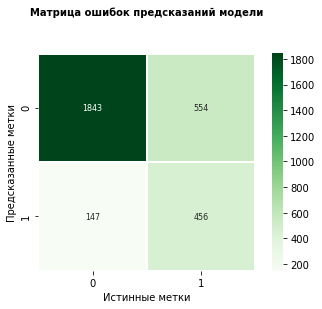

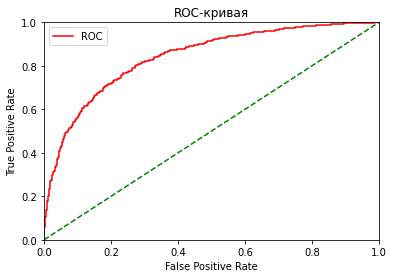

In [32]:
lgr_unbalanced_best = LogisticRegression(
    C=scores1[best][1], 
    penalty=scores1[best][2], 
    solver=scores1[best][3], 
    class_weight=scores1[best][4], 
    random_state=state)

lgr_unbalanced_best.fit(X_train, y_train)

show_metrics(lgr_unbalanced_best, X_valid, y_valid, display=True, fit_data=False)
show_confusion_matrix(lgr_unbalanced_best, X_valid, y_valid, fit_data=False)
roc_auc_graph(lgr_unbalanced_best, X_valid, y_valid, save_name='LgR_unbalanced_ROC_curve')

##### Результаты

Без учета дисбаланса классов модель показывает довольно высокую точность, но за ней скрывается низкое значение метрики `precision`, что свидетельствует о плохом качестве предсказаний класса `1`. По простому, модель плохо научилась прогнозировать ушел клиент или нет.

Высокие значения остальных метрик могут быть объяснены тем, что объектов класса `0` изначально было много, поэтому в полной мере оценить модель поможет сравнение ее метрик с метриками константной модели.

#### Набор тренировочных данных без дисбаланса классов в целевом признаке ✅

In [33]:
%%time

scores2 = []

for C in [0.01, 0.05, 0.1, 0.3, 0.5]:
    for penalty in ['l1', 'l2', 'none']: # Должно быть None, код не отрабатывает иначе
        for solver in ['lbfgs', 'liblinear']:
            # Обработка ошибок, связанных с тем,
            # что некоторые гиперпараметры нельзя сочетать
            try:
                lgr_balanced = LogisticRegression(
                    C=C, penalty=penalty, solver=solver, random_state=state)

                lgr_balanced.fit(X_train_upsampled, y_train_upsampled)
                final_score = lgr_balanced.score(X_valid, y_valid)
                scores2.append((final_score, C, penalty, solver,
                              'Upsampled Data'))

                lgr_balanced.fit(X_train_downsampled, y_train_downsampled)
                final_score = lgr_balanced.score(X_valid, y_valid)
                scores2.append((final_score, C, penalty, solver,
                              'Downsampled Data'))

            except ValueError:
                scores2.append((0, C, penalty, solver, 'Unknown'))


best = int()

for i, result in enumerate(scores2):
    if not np.isnan(result[0]) and result[0] > scores2[best][0]:
        best = i

print(f'Результаты модели Линейной регрессии на данных без дисбаланса классов в целевом признаке\n\n-----\n'
      f'Наилучшая точность: {scores2[best][0]}\n'
      f'C: {scores2[best][1]}\n'
      f'Penalty: {scores2[best][2]}\n'
      f'Solver: {scores2[best][3]}\n'
      f'Data Preprocess Type: {scores2[best][4]}')

Результаты модели Линейной регрессии на данных без дисбаланса классов в целевом признаке

-----
Наилучшая точность: 0.7733333333333333
C: 0.01
Penalty: l1
Solver: liblinear
Data Preprocess Type: Upsampled Data
CPU times: user 4.84 s, sys: 10.7 s, total: 15.5 s
Wall time: 15.5 s


				---Метрики модели---

Accuracy: 0.773

Mean Cross-val Accuracy : 0.801

Precision: 0.46

Recall: 0.736

F1 score: 0.566

ROC AUC: 0.824



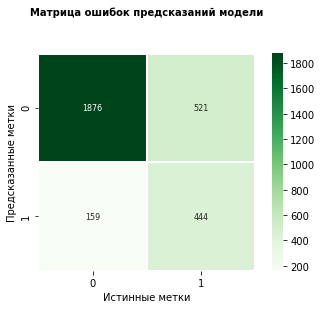

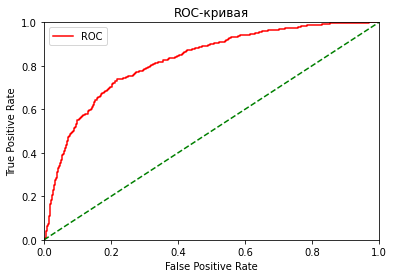

In [34]:
lgr_balanced_best = LogisticRegression(
    C=scores2[best][1], 
    penalty=scores2[best][2], 
    solver=scores2[best][3], 
    random_state=state)

lgr_balanced_best.fit(X_train_upsampled, y_train_upsampled)


show_metrics(lgr_balanced_best, X_valid, y_valid, display=True, fit_data=False)
show_confusion_matrix(lgr_balanced_best, X_valid, y_valid, fit_data=False)
roc_auc_graph(lgr_balanced_best, X_valid, y_valid, save_name='LgR_balanced_ROC_curve_downsampled_data')

##### Результаты


Даже после ручного устранения дисбаланса классов результаты практически не изменились: метрики крайне незначительно выросли, изгиб ROC-кривой не изменился.

### Случайный лес 🌳

#### Набор тренировочных данных без изменений ⚠️

In [35]:
%%time

scores3 = []

for n_est in [50, 100, 150]:
    for max_depth in [5, 7, 10]:
        for class_weight in ['balanced', None]:
            # Обработка ошибок, связанных с тем,
            # что некоторые гиперпараметры нельзя сочетать
            try:
                rfc_unbalanced = RandomForestClassifier(
                    n_estimators=n_est, max_depth=max_depth, class_weight=class_weight, random_state=state)

                final_score = cross_val_score(
                    rfc_unbalanced, X_train, y_train, cv=3).mean()
                scores3.append((final_score, n_est, max_depth, class_weight))

            except ValueError:
                scores3.append(
                    (0, n_est, max_depth, class_weight))


best = int()

for i, result in enumerate(scores3):
    if result[0] is not None and result[0] > scores3[best][0]:
        best = i

print(f'Результаты модели Случайного леса на данных без изменений\n\n-----\n'
      f'Наилучшая точность: {scores3[best][0]}\n'
      f'N esimators: {scores3[best][1]}\n'
      f'Max Depth: {scores3[best][2]}\n'
      f'Class weight: {scores3[best][3]}')

Результаты модели Случайного леса на данных без изменений

-----
Наилучшая точность: 0.8557484198635866
N esimators: 100
Max Depth: 10
Class weight: None
CPU times: user 13.9 s, sys: 149 ms, total: 14 s
Wall time: 14 s


				---Метрики модели---

Accuracy: 0.862

Mean Cross-val Accuracy : 0.859

Precision: 0.859

Recall: 0.375

F1 score: 0.522

ROC AUC: 0.859



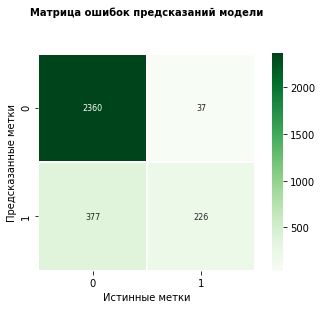

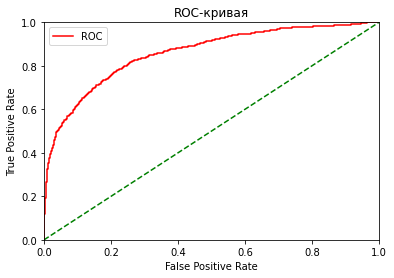

In [36]:
rfc_unbalanced_best = RandomForestClassifier(
    n_estimators=scores3[best][1], max_depth=scores3[best][2], class_weight=scores3[best][3], random_state=state)

rfc_unbalanced_best.fit(X_train, y_train)

show_metrics(rfc_unbalanced_best, X_valid, y_valid, display=True, fit_data=False)
show_confusion_matrix(rfc_unbalanced_best, X_valid, y_valid, fit_data=False)
roc_auc_graph(rfc_unbalanced_best, X_valid, y_valid, save_name='RFC_unbalanced_ROC_curve')

##### Результаты

Обучение модели случайного леса на данных без изменений приводит к не слишком впечатляющим результатам. Значения метрик в этом случае даже ниже, чем у логистической регрессии.

**Но получится ли улучшить результат?**

Обучим модель далее следующим образом:
- На данных с проведенным upsampling'ом
- На данных с проведенным downsampling'ом


**В результате:**
- Сможем оценить, существенно ли улучшится качество предсказаний модели, если обучать ее на данных, предобработанных при помощи апсемплинга или даунсемплинга.

#### Набор тренировочных данных без дисбаланса классов в целевом признаке ✅

In [37]:
%%time

scores4 = []

for n_est in [50, 100, 150]:
    for max_depth in [5, 7, 10]:
        for class_weight in ['balanced', None]:
            # Обработка ошибок, связанных с тем,
            # что некоторые гиперпараметры нельзя сочетать
            try:
                rfc_balanced = RandomForestClassifier(
                    n_estimators=n_est,
                    max_depth=max_depth,
                    class_weight=class_weight,
                    random_state=state)
                
                
                # Upsample data testing
                
                rfc_balanced.fit(X_train_upsampled, y_train_upsampled)
                final_score = rfc_balanced.score(
                    X_valid, y_valid)
                scores4.append((final_score, n_est, max_depth,
                              class_weight, 'Upsampled Data'))
                
                
                # Downsampling data testing
                
                rfc_balanced.fit(X_train_downsampled, y_train_downsampled)
                final_score = rfc_balanced.score(
                    X_valid, y_valid)
                scores4.append((final_score, n_est, max_depth, class_weight,
                              'Downsampled Data'))

            except ValueError:
                scores4.append(
                    (0, n_est, max_depth, class_weight))


best = int()

for i, result in enumerate(scores4):
    if result[0] is not None and result[0] > scores4[best][0]:
        best = i

print(f'Результаты модели Случайного леса на данных без дисбаланса классов в целевом признаке\n\n-----\n'
      f'Наилучшая точность: {scores4[best][0]}\n'
      f'N esimators: {scores4[best][1]}\n'
      f'Max Depth: {scores4[best][2]}\n'
      f'Class weight: {scores4[best][3]}\n'
      f'Data Preprocess Type: {scores4[best][4]}')

Результаты модели Случайного леса на данных без дисбаланса классов в целевом признаке

-----
Наилучшая точность: 0.8306666666666667
N esimators: 100
Max Depth: 10
Class weight: None
Data Preprocess Type: Upsampled Data
CPU times: user 11.8 s, sys: 102 ms, total: 11.9 s
Wall time: 11.9 s


				---Метрики модели---

Accuracy: 0.825

Mean Cross-val Accuracy : 0.859

Precision: 0.552

Recall: 0.683

F1 score: 0.611

ROC AUC: 0.86



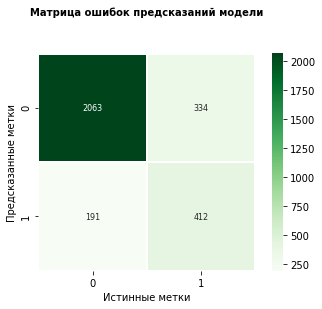

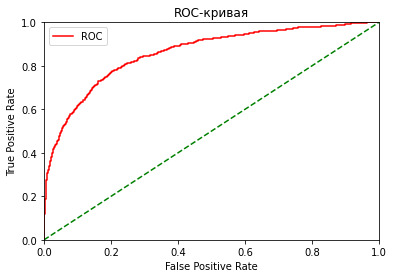

In [38]:
rfc_balanced_best = RandomForestClassifier(
    n_estimators=scores4[best][1], 
    max_depth=scores4[best][2], 
    class_weight=scores4[best][3], 
    random_state=state)

rfc_balanced_best.fit(X_train_upsampled, y_train_upsampled)

show_metrics(rfc_balanced_best, X_valid, y_valid, display=True, fit_data=False)
show_confusion_matrix(rfc_balanced_best, X_valid, y_valid, fit_data=False)
roc_auc_graph(rfc_balanced_best, X_valid, y_valid,
              save_name='RFC_balanced_ROC_curve_upsampled_data')

##### Результаты

Что ж, **результат стал лучше!** Выросла `F1-мера`, `Accuracy` и остальные метрики по мелочи

Теперь посмотрим на все до этого момента полученные графики `ROC-кривых` вместе и проведем более наглядное сравнение

### Сравнение ROC-кривых

**Логистическая регрессия без учета дисбаланса классов**

---

<img src="https://i.ibb.co/0tBnzjb/Lg-R-unbalanced-ROC-curve.jpg" alt="Логистическая регрессия без учета дисбаланса классов" width="300"/>

- **Accuracy:** `0.766`

- **Mean Cross-val Accuracy:** `0.766`

- **Precision:** `0.451`

- **Recall:** `0.756`

- **F1 score:** `0.565`

- **ROC AUC:** `0.841`

---

**Логистическая регрессия с учетом дисбаланса классов (произведено обучение с применением апсемплинга)**

---

<img src="https://i.ibb.co/sw7BzMy/Lg-R-balanced-ROC-curve-downsampled-data.jpg" alt="Логистическая регрессия с учетом дисбаланса классов" width="300"/>

- **Accuracy:** `0.773`

- **Mean Cross-val Accuracy:** `0.801`

- **Precision:** `0.46`

- **Recall:** `0.736`

- **F1 score:** `0.566`

- **ROC AUC:** `0.824`

---

**Случайный лес без учета дисбаланса классов**

---

<img src="https://i.ibb.co/tHgpXkJ/RFC-unbalanced-ROC-curve.jpg" alt="Случайный лес без учета дисбаланса классов" width="300"/>

- **Accuracy:** `0.862`

- **Mean Cross-val Accuracy:** `0.859`

- **Precision:** `0.859`

- **Recall:** `0.375`

- **F1 score:** `0.522`

- **ROC AUC:** `0.859`

---

**Случайный лес с учетом дисбаланса классов (произведено обучение с применением апсемплинга)**

---

<img src="https://i.ibb.co/F8cg8N4/RFC-balanced-ROC-curve-upsampled-data.jpg" alt="Случайный лес с учетом дисбаланса классов" width="300"/>

- **Accuracy:** `0.825`

- **Mean Cross-val Accuracy:** `0.859`

- **Precision:** `0.552`

- **Recall:** `0.683`

- **F1 score:** `0.611`

- **ROC AUC:** `0.86`

---

##### Результаты

Как видно из вышеприведенных графиков, случайный лес имеет значения `ROC AUC` в обоих случаях чуть выше, чем у модели линейной регресии, так как `ROC-кривая` более изогнута в сторону оси `TPR`.

Среди двух моделей случайного леса, одна из которых обучалась на дисбалансированных данных, а вторая на данных, предобработанных техникой апсемплинга, лучшие результаты показала модель, обучавшаяся на данных без дисбаланса, так как кривая также сильнее смещена в сторону оси `TPR`.

**Итого**, лучший результат на тренировочных данных, согласно графикам ROC-кривых и полученным метрикам, показала **модель случайного леса, обученная на данных, преобразованных с помощью апсемплинга.**

Переходим к тестированию модели и проверке ее на адекватность

## Тестирование лучшей модели, проверка ее на адекватность 😎

В результате сравнения классификационных моделей на предыдущих этапах была выбрана одна лучшая - `RandomForestClassifier` со следующими гиперпараметрами:
- **n_estimators** = `100`
- **max_depth** = `10`
- **class_weight** = `None`
- **Train data preprocess:** `Upsampled Data`

Ее протестируем на тестовом наборе и проверим на *адекватность* (действительно ли она обладает предсказательной силой или вся наша работа прошла впустую xd), сравнив значения метрик нашей модели со значениями тех же метрик у константной модели. 

Если значения метрик нашей модели выше, то модель адекватна и обладает предсказательной силой.

### Тестирование модели 🧪

				---Метрики модели---

Accuracy: 0.82

Mean Cross-val Accuracy : 0.857

Precision: 0.556

Recall: 0.695

F1 score: 0.618

ROC AUC: 0.857



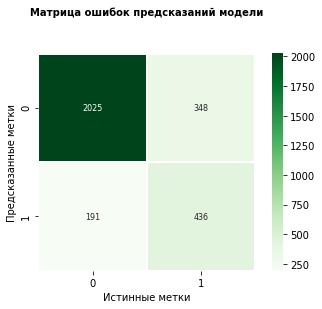

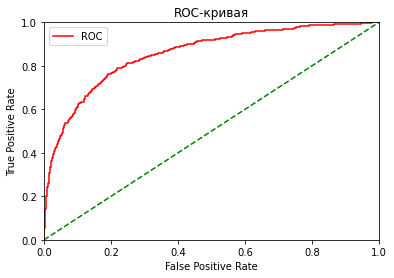

In [39]:
model = RandomForestClassifier(
    n_estimators=100, max_depth=10, random_state=state)
model.fit(X_train_upsampled, y_train_upsampled)

show_metrics( # Метрики
    model, X_test, y_test, fit_data=False, display=True)

show_confusion_matrix( # Матрица ошибок предсказаний
    model, X_test, y_test, fit_data=False)

roc_auc_graph( # ROC-кривая
    model, X_test, y_test)

**Модель показывает удовлетворительные результаты.** 

Значение F1-меры равно `0.619` (могут быть незначительные различия при перезапуске проекта), что больше минимально допустимого значения в `0.59`.

Тестирование прошло успешно, проверим модель на адекватность

### Проверка модели на адекватность 🤨

In [40]:
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=12345)
dummy_clf.fit(X_train, y_train)

dummy_clf_metrics = show_metrics(dummy_clf, X_test, y_test, fit_data=False)

our_model_metrics = show_metrics(model, X_test, y_test, fit_data=False)

metric_comparison = []

for (dummy_metric, dummy_value), (our_model_metric, our_model_value) in zip(dummy_clf_metrics.items(), our_model_metrics.items()):
    metric_comparison.append((dummy_metric, dummy_value, our_model_value))
    print(f'\t\t\t\tМетрика -> {dummy_metric}\n'
          f'\tЗначение дамми-модели: {dummy_value} | Значение тестируемой модели: {our_model_value}\n\n')


adequacy = True

for metric, dummy_value, our_model_value in metric_comparison:
    if dummy_value > our_model_value:
        print(
            f'❌ Что-то не так! Метрика {metric} у дамми-модели больше, чем у вашей.')
        adequacy = False
        break
        
if adequacy:
    print('✅ Все хорошо! Модель прошла проверку на адекватность' 
          ' относительно константной модели')
else:
    print('❌ Код красный! Модель не прошла проверку на адекватность' 
          ' относительно константной модели')

				Метрика -> accuracy
	Значение дамми-модели: 0.791 | Значение тестируемой модели: 0.82


				Метрика -> cross_val_score
	Значение дамми-модели: 0.791 | Значение тестируемой модели: 0.857


				Метрика -> precision
	Значение дамми-модели: 0.0 | Значение тестируемой модели: 0.556


				Метрика -> recall
	Значение дамми-модели: 0.0 | Значение тестируемой модели: 0.695


				Метрика -> f1
	Значение дамми-модели: 0.0 | Значение тестируемой модели: 0.618


				Метрика -> roc_auc
	Значение дамми-модели: 0.5 | Значение тестируемой модели: 0.857


✅ Все хорошо! Модель прошла проверку на адекватность относительно константной модели


Проверка на адекватность пройдена!

Теперь и модель показать не стыдно :)

## Общий вывод 👀

<div style="border: 3px solid rgb(119,212,150); padding: 20px">
    
В нашем распоряжении оказались исторические данные о клиентах банка. Требовалось построить прогностическую модель, которая показала бы на тестовых данных значение метрики `F1` более `0.59`.
    
Финальная модель показала значение метрики `F1` равное `0.619`, что является удовлетворительным результатом, применительно к нашей задаче.
    
### Краткая сводка по выполненным задачам

#### Шаг 1. Обзор данных

- Выполнен импорт необходимых для исследования библиотек
- Данные загружены и прочитаны, предусмотрены альтернативные способы получения исходных данных
- Оценена информация о данных

#### Шаг 2. Предобработка данных

- Произведено "внешнее" преобразование данных: удалены не влияющие на результат столбцы, изменены названия столбцов на корректные
- Обработаны пропуски
    - Признак `tenure`. Пропуски были заполнены средним значением по возрастной группе (уникальные значения признака `age`)
- Проверено наличие явных дубликатов
- Выполнено разбиение данных на три набора: тренировочный `(60%)`, валидационный `(20%)` и тестовый `(20%)`
- Выполнено кодирование категориальных признаков техникой `OneHotEncoding`
- Выполнена стандартизация числовых признаков при помощи `sklearn.preprocessing.StandardScaler`
- Сформированы альтернативные наборы тренировочных данных для оценки влияния дисбаланса классов в таргете на конечные метрики
    - Данные, преобразованные техникой `upsampling`
    - Данные, преобразованные техникой `downsampling`

#### Шаг 3. Обучение моделей

- Для оптимизации процесса оценки результатов был создан ряд полезных функций:
    - `show_metrics` - просмотр метрик модели
    - `roc_auc_graph` - график ROC-кривой качества предсказаний модели
    - `show_confusion_matrix` - матрица ошибок предсказаний модели

- Рассматриваемые модели:
    - `LogisticRegression`
    - `RandomForestClassifier`

- Обучение моделей включило в себя следующие подэтапы:
    - Обучение модели на наборе без изменений
        - Получение модели с наилучшими гиперпараметрами
    - Обучение модели на наборе без дисбаланса классов в целевом признаке
        - Обучение на данных с проведенным upsampling'ом;
        - Обучение на данных с проведенным downsampling'ом;
        - Получение модели с наилучшими гиперпараметрами.
    
- Сравнены все полученные результаты, оценены наблюдения на графиках ROC-кривых предсказаний всех полученных ранее моделей

#### Шаг 4. Тестирование модели, проверка ее на адекватность

- Была выбрана модель `RandomForestClassifier`, обучавшаяся на данных с проведенным upsampling'ом. На тестовых данных модель показала следующие значения метрик:
    - **Accuracy:** `0.822`

    - **Mean Cross-val Accuracy:** `0.847`

    - **Precision:** `0.565`

    - **Recall:** `0.694`

    - **F1 score:** `0.619` > `0.59` ✅

    - **ROC AUC:** `0.86`

- Модель проверена на адекватность: модель адекватна.

### Что могло привести к получению неполноценных результатов?
- **Малый объем данных.** Из-за этого модели были склонны к недообучению, что отрицательно влияет на значения метрик, а в случае downsampling'а данных, размер выборки оказался слишком мал;
- **Малое число признаков.** Возможно, добавление некоторого числа значимых признаков клиентов могло бы положительно повлиять на качество предсказаний модели, учитывая, что объем данных не велик;
- **Малое кол-во информации об ушедших клиентах (в дополнение к предыдущему).** В ходе исследования было установлено, что соотношение классов в целевом признаке `4:1` в пользу класса `0` (клиент не ушел), а нам требовалось предсказать именно класс `1`, поэтому в ходе обучения моделей они были склонны к тому, чтобы лучше предсказывать именно класс `0`. (даже в случае устранения дисбаланса путем увеличения или уменьшения тренировочной выборки, количество уникальных клиентов в классе `1` никак не менялось, поэтому если их изначально было бы больше, то результаты могли бы улучшиться)
</div>